# Homework 11 : Julia_1101 Yu_Hao Tseng
## PPT : 14_More_functions.pptx (p.1)
### https://github.com/ja754969/Julia-Programming/blob/master/Homework/hw11_TsengYuHao.ipynb

---
# Practice

---
## More complex types of inputs for a function

In [2]:
function f2(x::Array{Float64}, y::Float64)
    return x.+y
end

f2 (generic function with 1 method)

In [3]:
f2([1.0,2.0],2.0)

2-element Vector{Float64}:
 3.0
 4.0

In [4]:
# f2(1.0,2.0)

In [5]:
function f3(x::Array{Float64,2}, y::Float64)
    return x.+y
end

f3 (generic function with 1 method)

In [6]:
f3([1.0 2.0;2.0 4.0],2.0)

2×2 Matrix{Float64}:
 3.0  4.0
 4.0  6.0

In [7]:
# f3([1.0,2.0],2.0)

---
## Some other way to build a function

In [8]:
g(x,y) = sqrt(x^2 + y^2)

g (generic function with 1 method)

In [9]:
f(x,y) = x+y

f (generic function with 1 method)

---
## Optional Arguments/Inputs (Mutiple methods)

In [10]:
function xyz(x,y,z)
    println("$x, $y, $z")
end

xyz (generic function with 1 method)

### Give z a default value

In [11]:
function xyz(x,y,z=0)
    println("$x, $y, $z")
end

xyz (generic function with 2 methods)

In [12]:
xyz(1,2)

1, 2, 0


In [13]:
xyz(1,2,3)

1, 2, 3


In [14]:
?xyz

search: xyz



No documentation found.

`xyz` is a `Function`.

```
# 2 methods for generic function "xyz":
[1] xyz(x, y) in Main at In[11]:1
[2] xyz(x, y, z) in Main at In[11]:1
```


### Building a function documentation

In [15]:
"""
xyz(x,y,z)

This is a two-method function : 
xyz(x, y)
xyz(x, y, z=0); z=0 for a default
"""
function xyz(x, y, z=0)
    println("$x, $y, $z")
end

xyz

In [16]:
?xyz

search: xyz



xyz(x,y,z)

This is a two-method function :  xyz(x, y) xyz(x, y, z=0); z=0 for a default


## Keyword arguments/inputs
### To give the inputs of a function without "sequent arrangement" 

In [17]:
function f(p, q ; r = 5, s = "hi")
    println("p is $p")
    println("q is $q")
    return "r => $r, s >= $s"
end

f (generic function with 1 method)

In [18]:
f(1, 2, r=0, s=10)

p is 1
q is 2


"r => 0, s >= 10"

In [19]:
f(s=0, r=10, 1, 2)

p is 1
q is 2


"r => 10, s >= 0"

---
## Functions with unfixed-number of inputs

In [20]:
function fvar(ins ...)
    println("you gave $(length(ins)) inputs")
    for m in ins
        println(" input ",m)
    end
end

fvar (generic function with 1 method)

In [21]:
fvar(128,129)

you gave 2 inputs
 input 128
 input 129


---
## Create functions in a function

In [22]:
function create_exponent_function(x)
    function newfunction(y)
        return y^x
    end
end

create_exponent_function (generic function with 1 method)

### Test the function we have just created (square)

In [23]:
squarer = create_exponent_function(2)

(::var"#newfunction#2"{Int64}) (generic function with 1 method)

In [24]:
squarer(4)

16

### Test the function we have just created (cubic)

In [25]:
cuber = create_exponent_function(3)

(::var"#newfunction#2"{Int64}) (generic function with 1 method)

In [26]:
cuber(4)

64

In [27]:
cuber.([1,2,3])

3-element Vector{Int64}:
  1
  8
 27

---
## vectors, streamlines
### ndgrid.jl

In [28]:
# include("ndgrid.jl")

In [29]:
x = Array(-3:0.1:3)
y = Array(-5:0.1:5);

In [30]:
function meshgrid_xy(x::Vector{Float64}, y::Vector{Float64})
    x = sort(x) # arrange from left to right
    y = sort(y,rev=true) # arrange from top to bottom 
    xx = Array{Float64}(zeros(length(y),length(x)))
    yy = Array{Float64}(zeros(length(y),length(x)))
    for yi = 1:length(y)
        xx[yi,:] = x
    end
    for xi = length(x):-1:1
        yy[:,xi] = y
    end
    return Array{Float64}(xx), Array{Float64}(yy)
end

meshgrid_xy (generic function with 1 method)

In [31]:
(xx, yy) = meshgrid_xy(x, y)

([-3.0 -2.9 … 2.9 3.0; -3.0 -2.9 … 2.9 3.0; … ; -3.0 -2.9 … 2.9 3.0; -3.0 -2.9 … 2.9 3.0], [5.0 5.0 … 5.0 5.0; 4.9 4.9 … 4.9 4.9; … ; -4.9 -4.9 … -4.9 -4.9; -5.0 -5.0 … -5.0 -5.0])

In [32]:
# xx
# yy

In [33]:
using PyPlot

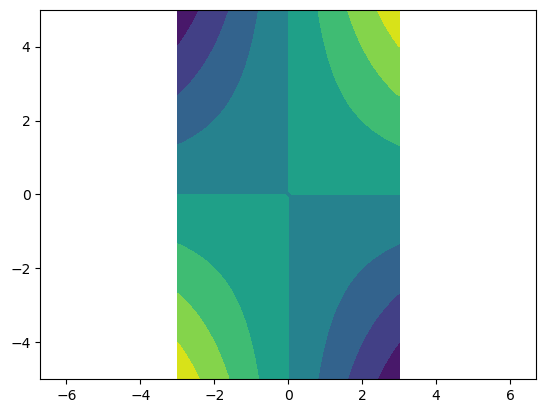

(-3.0, 3.0, -5.0, 5.0)

In [34]:
Z = xx.*yy
contourf(xx,yy,Z)
axis("equal")

In [35]:
H = yy.*exp.(-xx.^2-yy.^2)

101×61 Matrix{Float64}:
  8.56954e-15   1.54594e-14   2.73363e-14  …   1.54594e-14   8.56954e-15
  2.26014e-14   4.07727e-14   7.20969e-14      4.07727e-14   2.26014e-14
  5.84045e-14   1.05361e-13   1.86306e-13      1.05361e-13   5.84045e-14
  1.47871e-13   2.66757e-13   4.71698e-13      2.66757e-13   1.47871e-13
  3.66806e-13   6.61714e-13   1.17009e-12      6.61714e-13   3.66806e-13
  8.91454e-13   1.60817e-12   2.84368e-12  …   1.60817e-12   8.91454e-13
  2.12257e-12   3.82908e-12   6.77084e-12      3.82908e-12   2.12257e-12
  4.95123e-12   8.93196e-12   1.57941e-11      8.93196e-12   4.95123e-12
  1.13147e-11   2.04116e-11   3.60932e-11      2.04116e-11   1.13147e-11
  2.53305e-11   4.56959e-11   8.08025e-11      4.56959e-11   2.53305e-11
  5.55518e-11   1.00215e-10   1.77206e-10  …   1.00215e-10   5.55518e-11
  1.19343e-10   2.15293e-10   3.80695e-10      2.15293e-10   1.19343e-10
  2.51143e-10   4.53059e-10   8.01129e-10      4.53059e-10   2.51143e-10
  ⋮                        

# Homework 11